In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import sys

# only needed for tutorial, monkey patches visualization
sys.path.append('..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

# Point cloud
This tutorial demonstrates basic usage of a point cloud.

## Visualize point cloud
The first part of the tutorial reads a point cloud and visualizes it.

Load a ply point cloud, print it, and render it
PointCloud with 196133 points.
[[0.65234375 0.84686458 2.37890625]
 [0.65234375 0.83984375 2.38430572]
 [0.66737998 0.83984375 2.37890625]
 ...
 [2.00839925 2.39453125 1.88671875]
 [2.00390625 2.39488506 1.88671875]
 [2.00390625 2.39453125 1.88793314]]


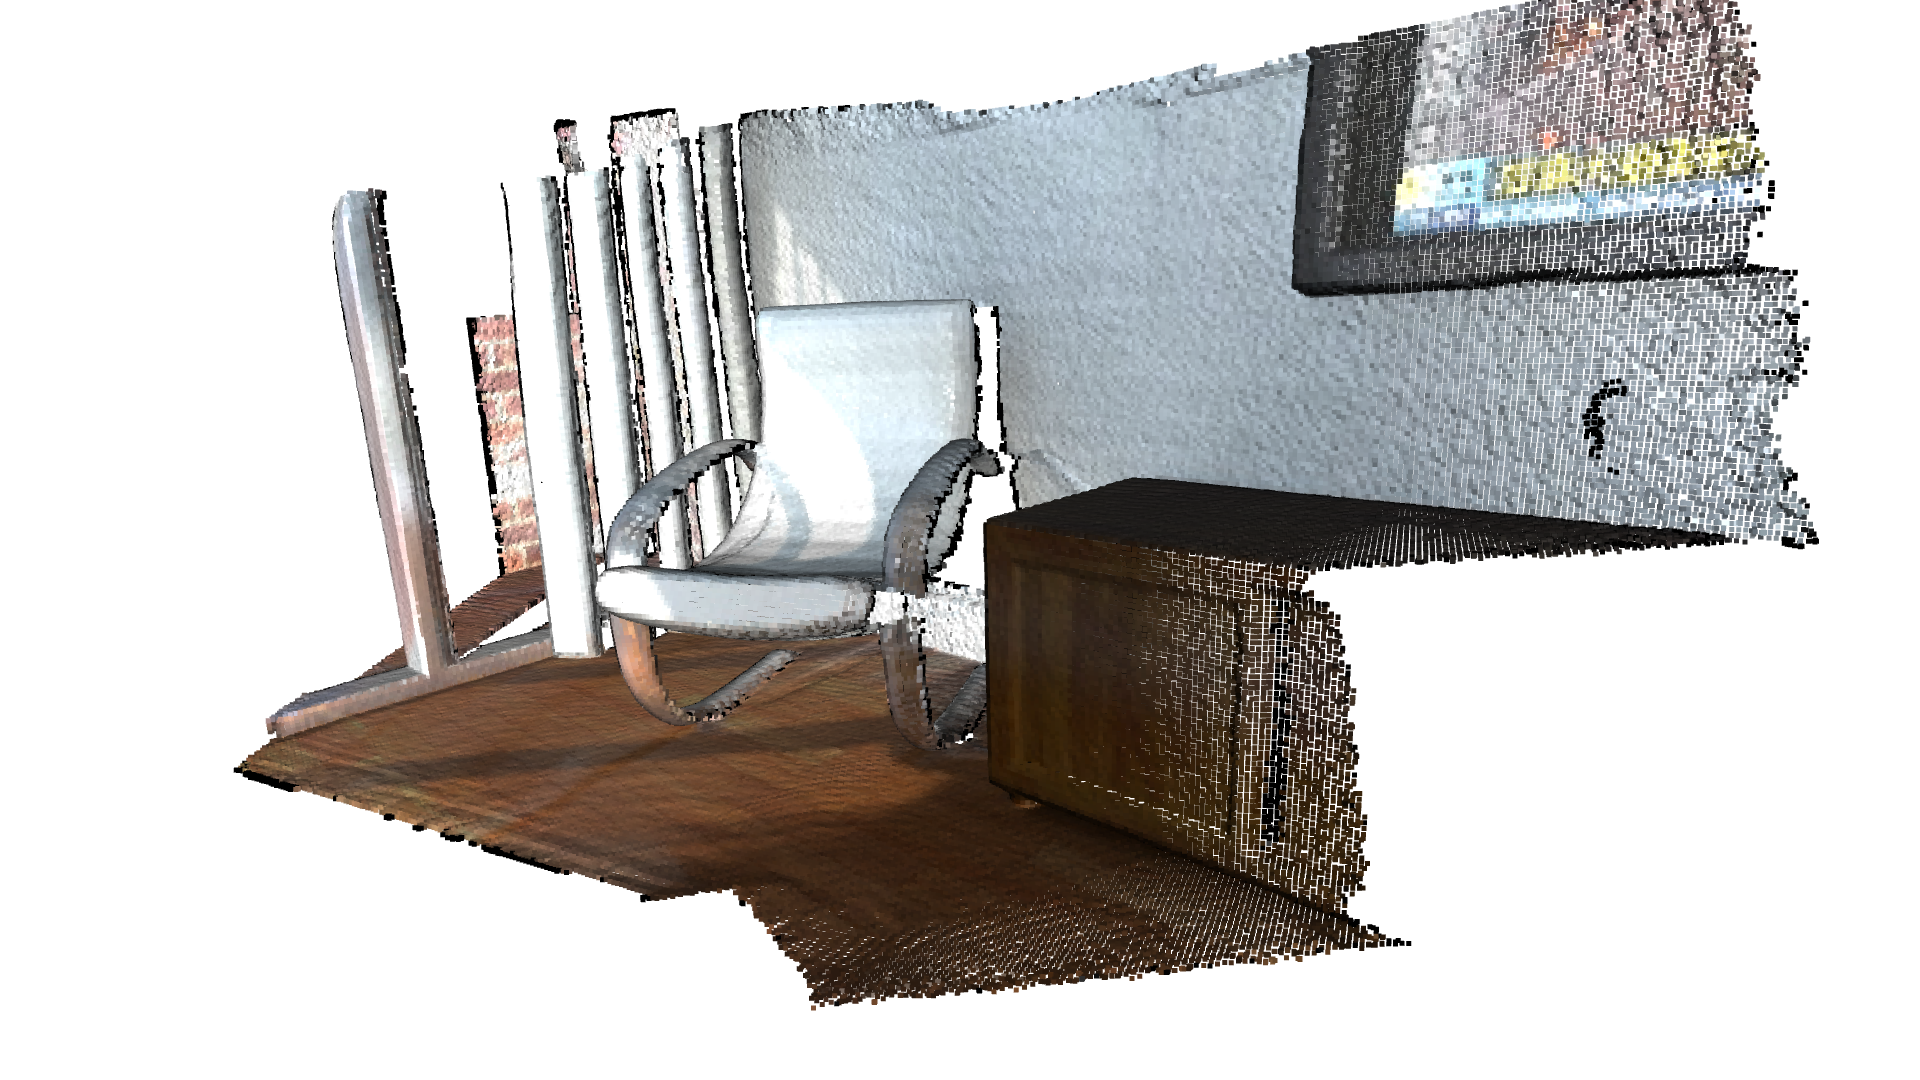

In [2]:
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud(o3dtut.get_data_path_common("fragment.ply"))
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

`read_point_cloud` reads a point cloud from a file. It tries to decode the file based on the extension name. For a list of supported file types, refer to [File IO](file_io.ipynb).

`draw_geometries` visualizes the point cloud. Use a mouse/trackpad to see the geometry from different view points.

It looks like a dense surface, but it is actually a point cloud rendered as surfels. The GUI supports various keyboard functions. For instance, the `-` key reduces the size of the points (surfels).

<div class="alert alert-info">
    
**Note:** 

Press the `H` key to print out a complete list of keyboard instructions for the GUI. For more information of the visualization GUI, refer to [Visualization](visualization.ipynb) and [Customized visualization](../visualization/customized_visualization.rst).

</div>

<div class="alert alert-info">
    
**Note:** 

On macOS, the GUI window may not receive keyboard events. In this case, try to launch Python with `pythonw` instead of `python`.

</div>

## Voxel downsampling
Voxel downsampling uses a regular voxel grid to create a uniformly downsampled point cloud from an input point cloud. It is often used as a pre-processing step for many point cloud processing tasks. The algorithm operates in two steps:

1. Points are bucketed into voxels.
2. Each occupied voxel generates exactly one point by averaging all points inside.

Downsample the point cloud with a voxel of 0.05


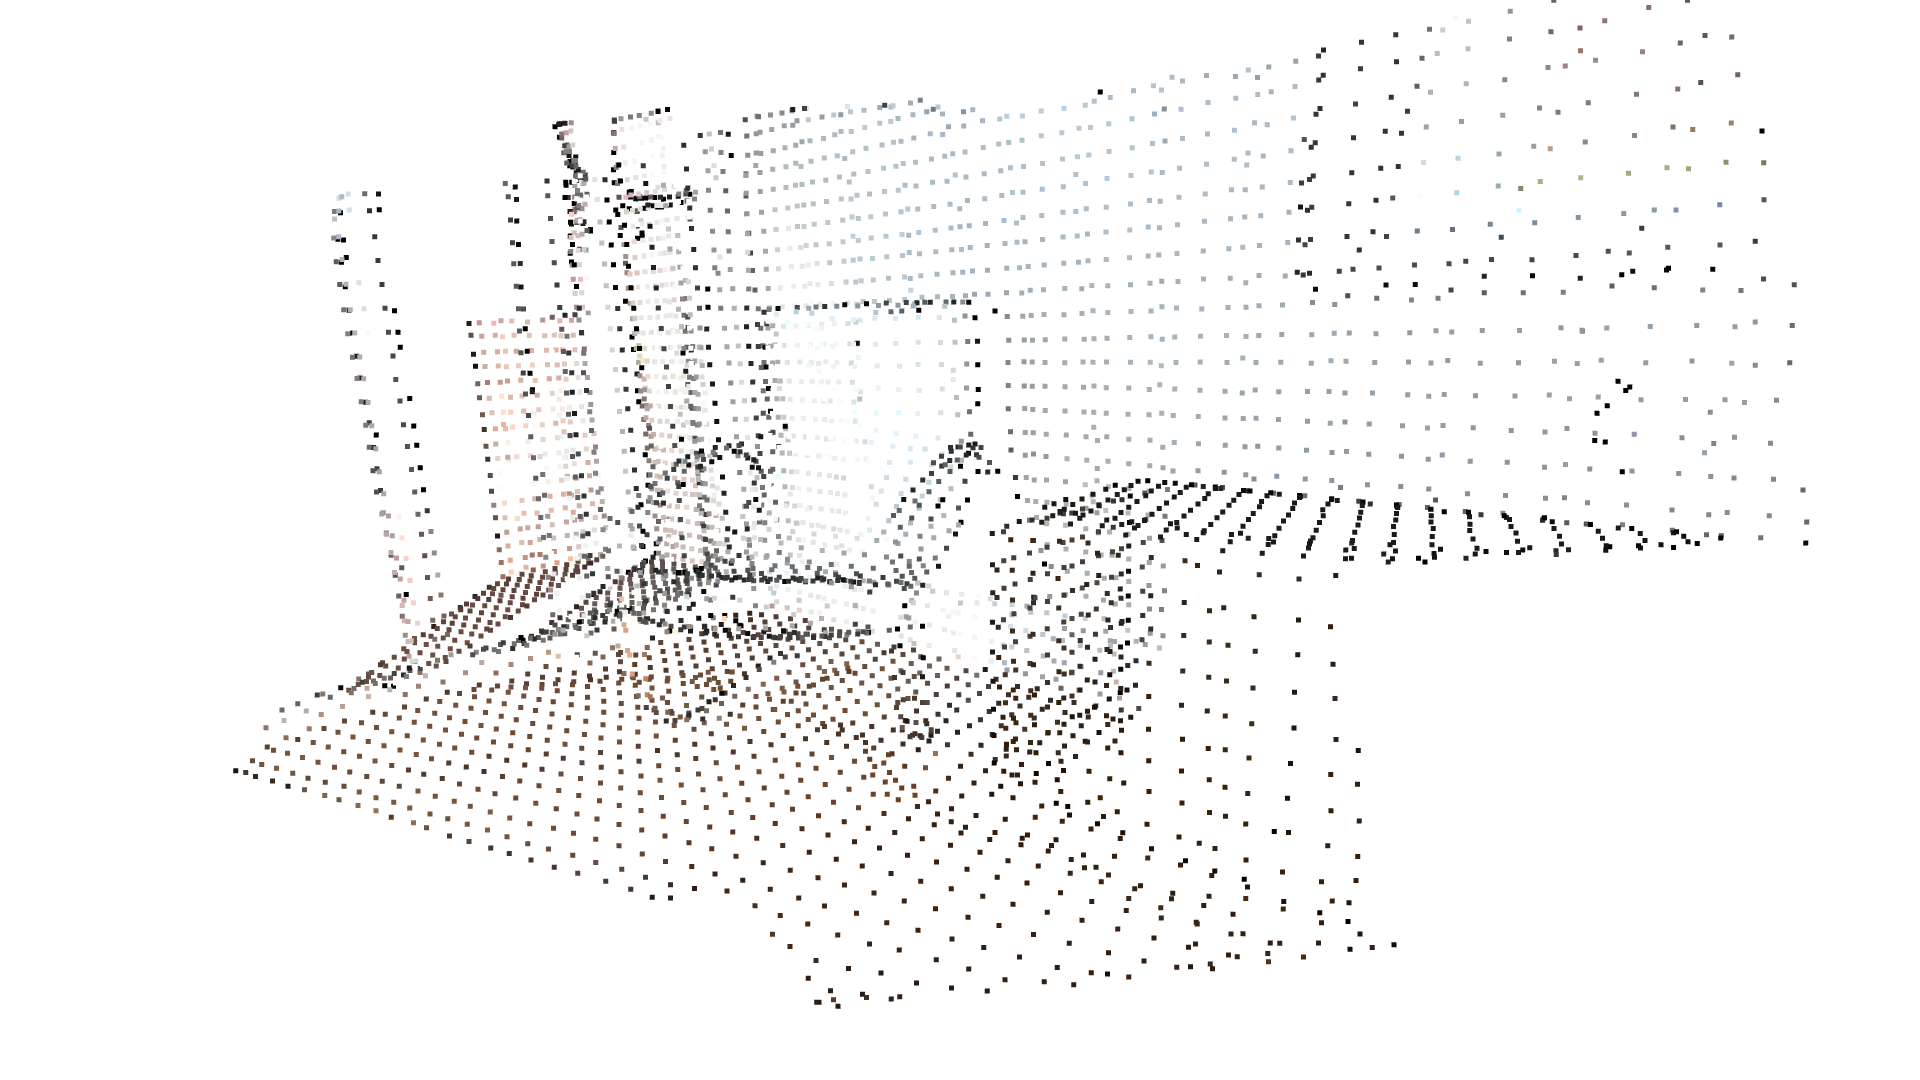

In [3]:
print("Downsample the point cloud with a voxel of 0.05")
downpcd = pcd.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([downpcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

## Vertex normal estimation
Another basic operation for point cloud is point normal estimation.
Press `N` to see point normals. The keys `-` and `+` can be used to control the length of the normal.

Recompute the normal of the downsampled point cloud


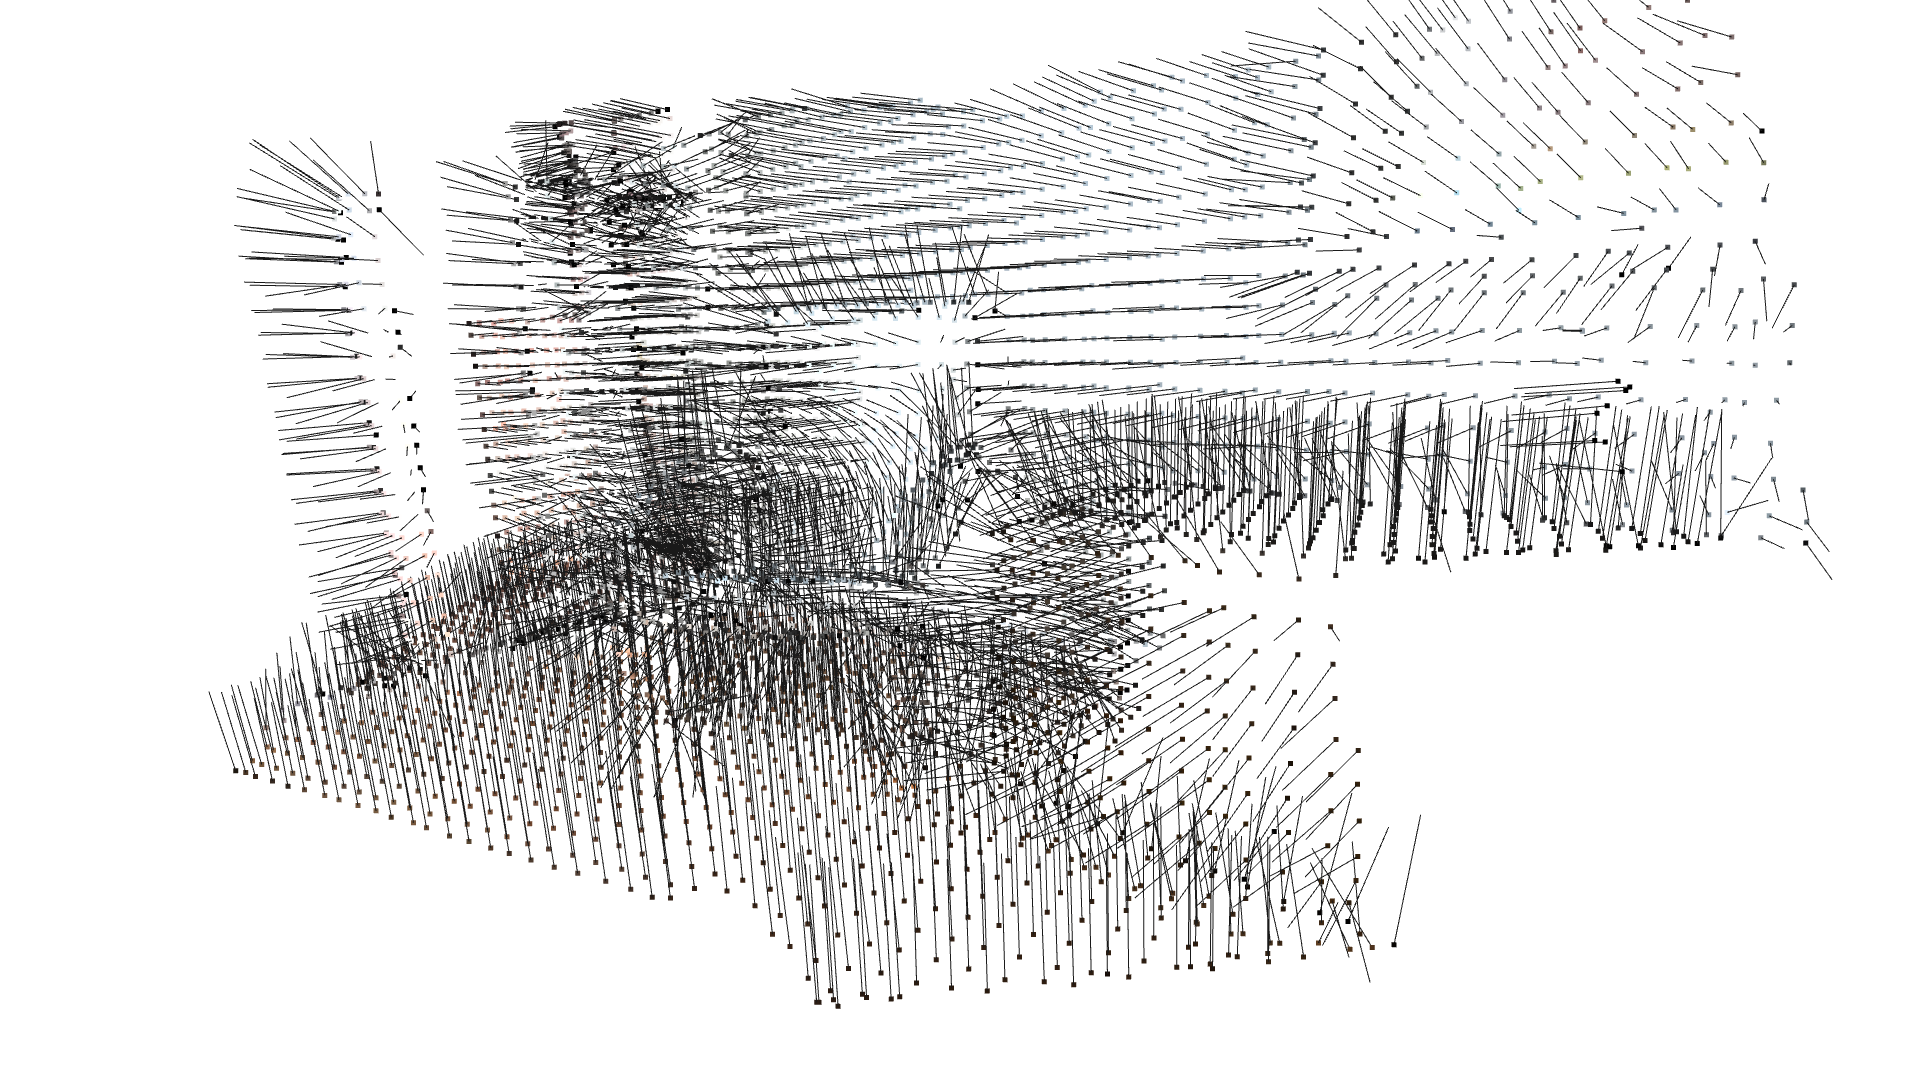

In [4]:
print("Recompute the normal of the downsampled point cloud")
downpcd.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
o3d.visualization.draw_geometries([downpcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024],
                                  point_show_normal=True)

`estimate_normals` computes the normal for every point. The function finds adjacent points and calculates the principal axis of the adjacent points using covariance analysis.

The function takes an instance of `KDTreeSearchParamHybrid` class as an argument. The two key arguments `radius = 0.1` and `max_nn = 30` specifies search radius and maximum nearest neighbor. It has 10cm of search radius, and only considers up to 30 neighbors to save computation time.

<div class="alert alert-info">
    
**Note:** 

The covariance analysis algorithm produces two opposite directions as normal candidates. Without knowing the global structure of the geometry, both can be correct. This is known as the normal orientation problem. Open3D tries to orient the normal to align with the original normal if it exists. Otherwise, Open3D does a random guess. Further orientation functions such as `orient_normals_to_align_with_direction` and `orient_normals_towards_camera_location` need to be called if the orientation is a concern.

</div>

## Access estimated vertex normal
Estimated normal vectors can be retrieved from the `normals` variable of `downpcd`.

In [5]:
print("Print a normal vector of the 0th point")
print(downpcd.normals[0])

Print a normal vector of the 0th point
[-0.21838377 -0.94240442 -0.25334252]


To check out other variables, please use `help(downpcd)`. Normal vectors can be transformed as a numpy array using `np.asarray`.

In [6]:
print("Print the normal vectors of the first 10 points")
print(np.asarray(downpcd.normals)[:10, :])

Print the normal vectors of the first 10 points
[[-0.21838377 -0.94240442 -0.25334252]
 [-0.39147152 -0.43746664 -0.8095511 ]
 [-0.00694405 -0.99478075 -0.10179902]
 [-0.00399871 -0.99965423 -0.02598917]
 [-0.93768261 -0.07378998  0.3395679 ]
 [-0.43476205 -0.62438493 -0.64894177]
 [-0.09739809 -0.9928602  -0.06886388]
 [-0.11728718 -0.95516445 -0.27185399]
 [-0.01038945 -0.99968858 -0.02268921]
 [-0.00816546 -0.99965616 -0.02491762]]


Check [Working with NumPy](working_with_numpy.ipynb) for more examples regarding numpy arrays.

## Crop point cloud

Load a polygon volume and use it to crop the original point cloud


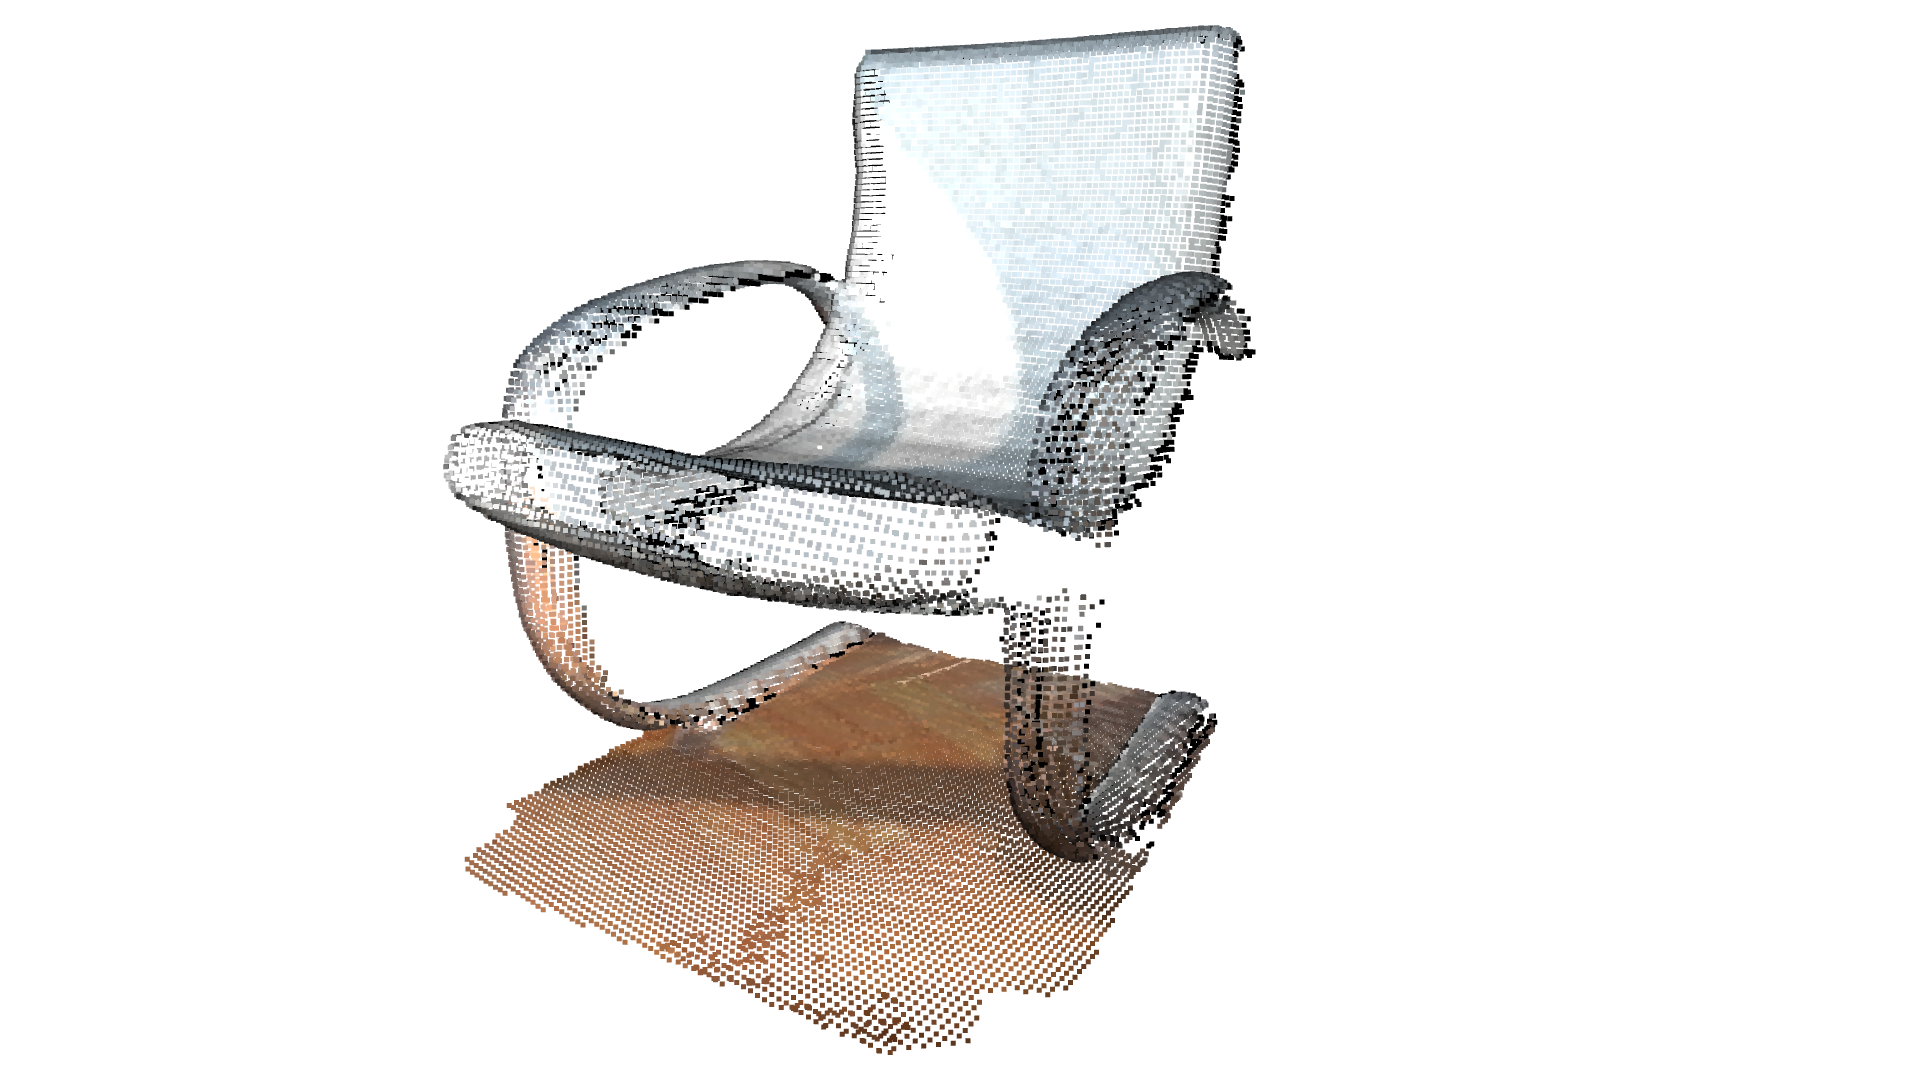

In [7]:
print("Load a polygon volume and use it to crop the original point cloud")
vol = o3d.visualization.read_selection_polygon_volume(
    o3dtut.get_data_path_common("Crop/cropped.json"))
chair = vol.crop_point_cloud(pcd)
o3d.visualization.draw_geometries([chair],
                                  zoom=0.7,
                                  front=[0.5439, -0.2333, -0.8060],
                                  lookat=[2.4615, 2.1331, 1.338],
                                  up=[-0.1781, -0.9708, 0.1608])

`read_selection_polygon_volume` reads a json file that specifies polygon selection area. `vol.crop_point_cloud(pcd)` filters out points. Only the chair remains.

## Paint point cloud

Paint chair


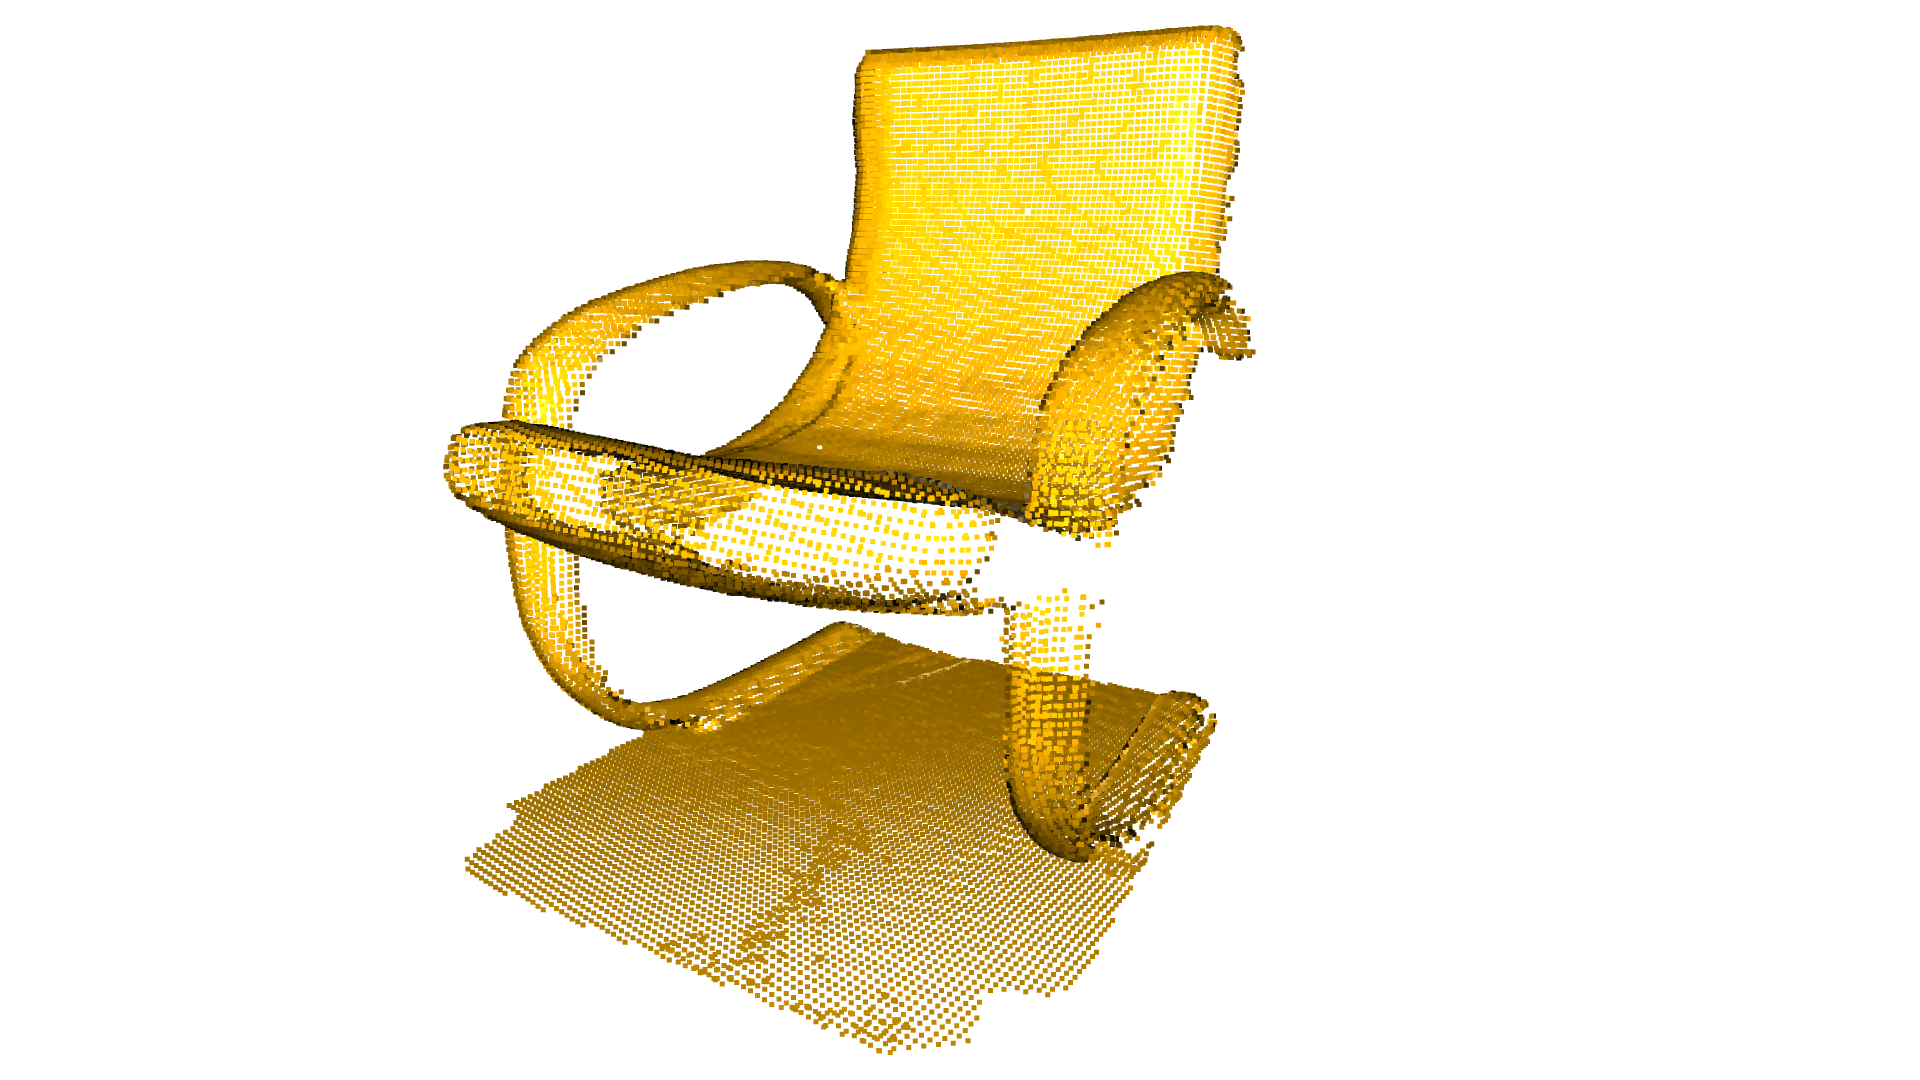

In [8]:
print("Paint chair")
chair.paint_uniform_color([1, 0.706, 0])
o3d.visualization.draw_geometries([chair],
                                  zoom=0.7,
                                  front=[0.5439, -0.2333, -0.8060],
                                  lookat=[2.4615, 2.1331, 1.338],
                                  up=[-0.1781, -0.9708, 0.1608])

`paint_uniform_color` paints all the points to a uniform color. The color is in RGB space, [0, 1] range.

## Point cloud distance
Open3D provides the method `compute_point_cloud_distance` to compute the distance from a source point cloud to a target point cloud. I.e., it computes for each point in the source point cloud the distance to the closest point in the target point cloud.

In the example below we use the function to compute the difference between two point clouds. Note that this method could also be used to compute the Chamfer distance between two point clouds.

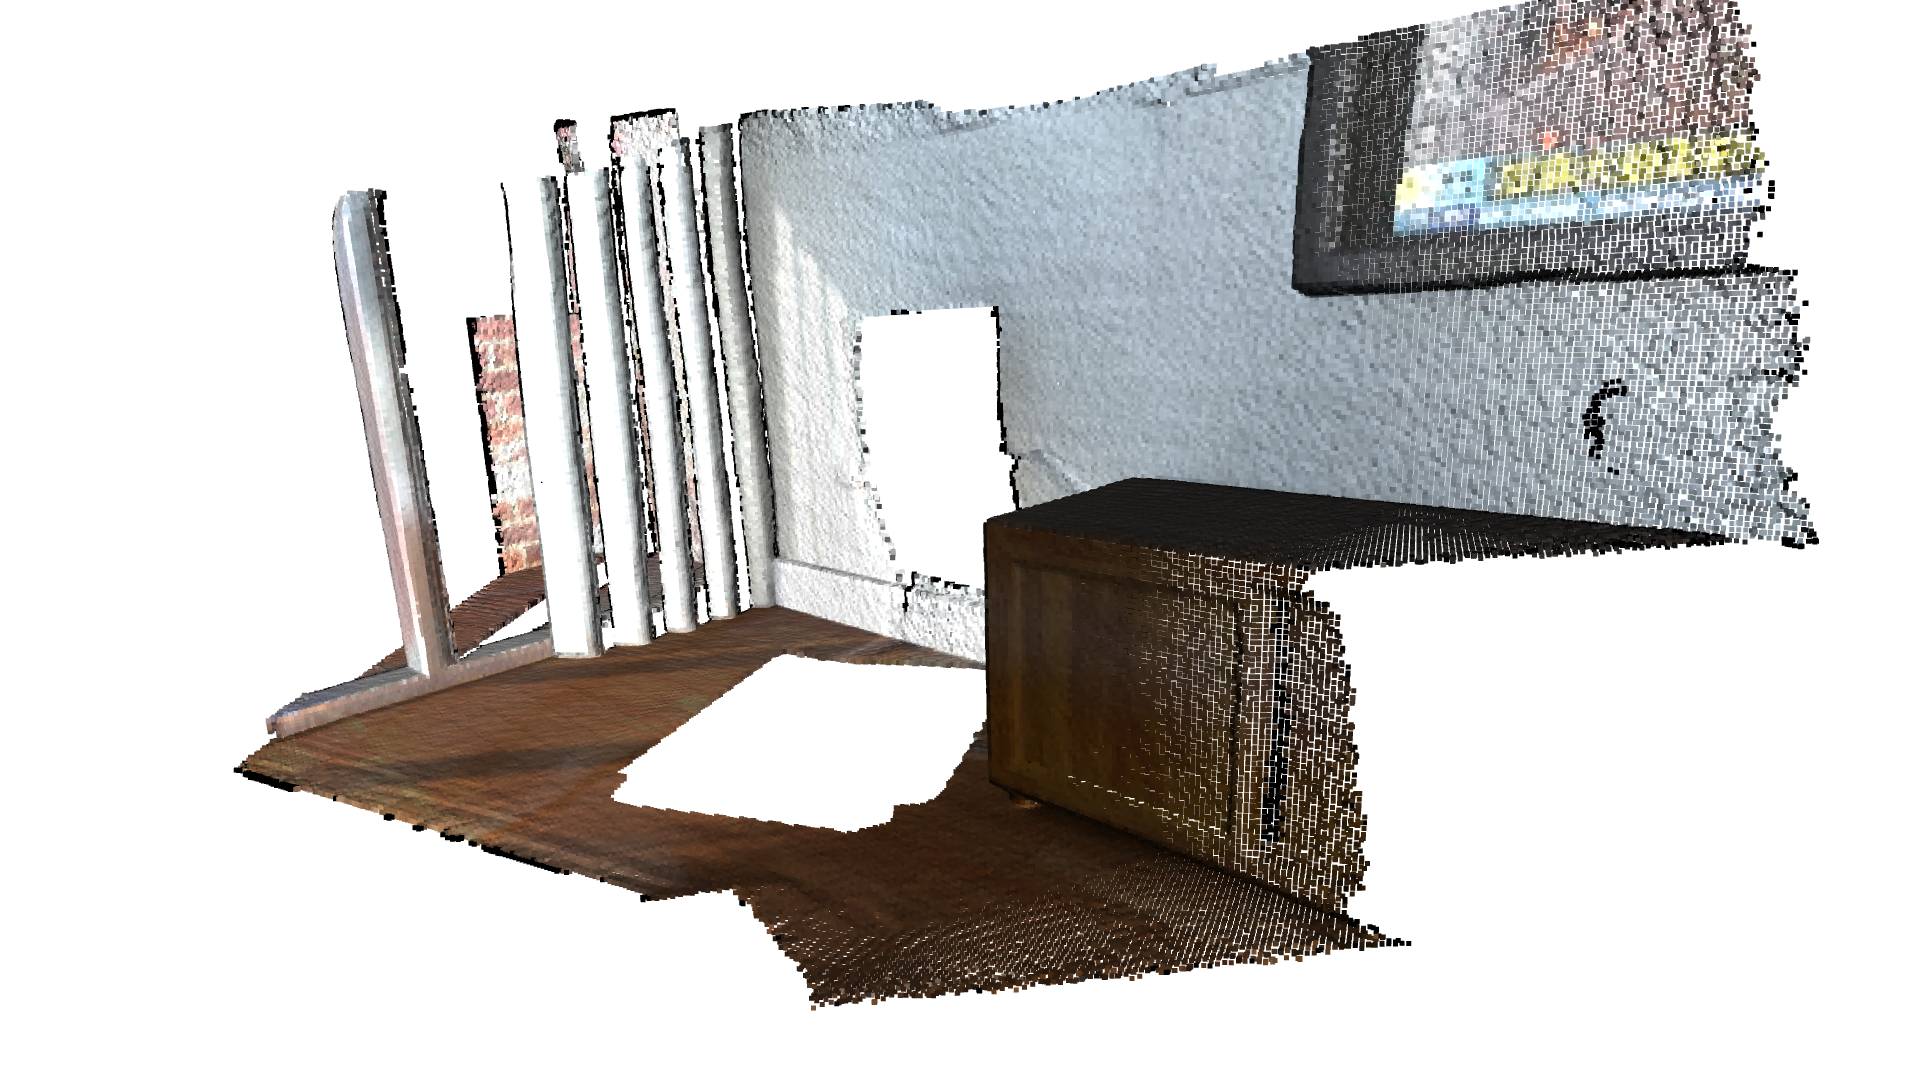

In [11]:
# Load data
pcd = o3d.io.read_point_cloud(o3dtut.get_data_path_common("fragment.ply"))
vol = o3d.visualization.read_selection_polygon_volume(
    o3dtut.get_data_path_common("Crop/cropped.json"))

chair = vol.crop_point_cloud(pcd)

dists = pcd.compute_point_cloud_distance(chair)
dists = np.asarray(dists)
ind = np.where(dists > 0.01)[0]
pcd_without_chair = pcd.select_by_index(ind)
o3d.visualization.draw_geometries([pcd_without_chair],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

## Bounding volumes
The `PointCloud` geometry type has bounding volumes as all other geometry types in Open3D. Currently, Open3D implements an `AxisAlignedBoundingBox` and an `OrientedBoundingBox` that can also be used to crop the geometry.

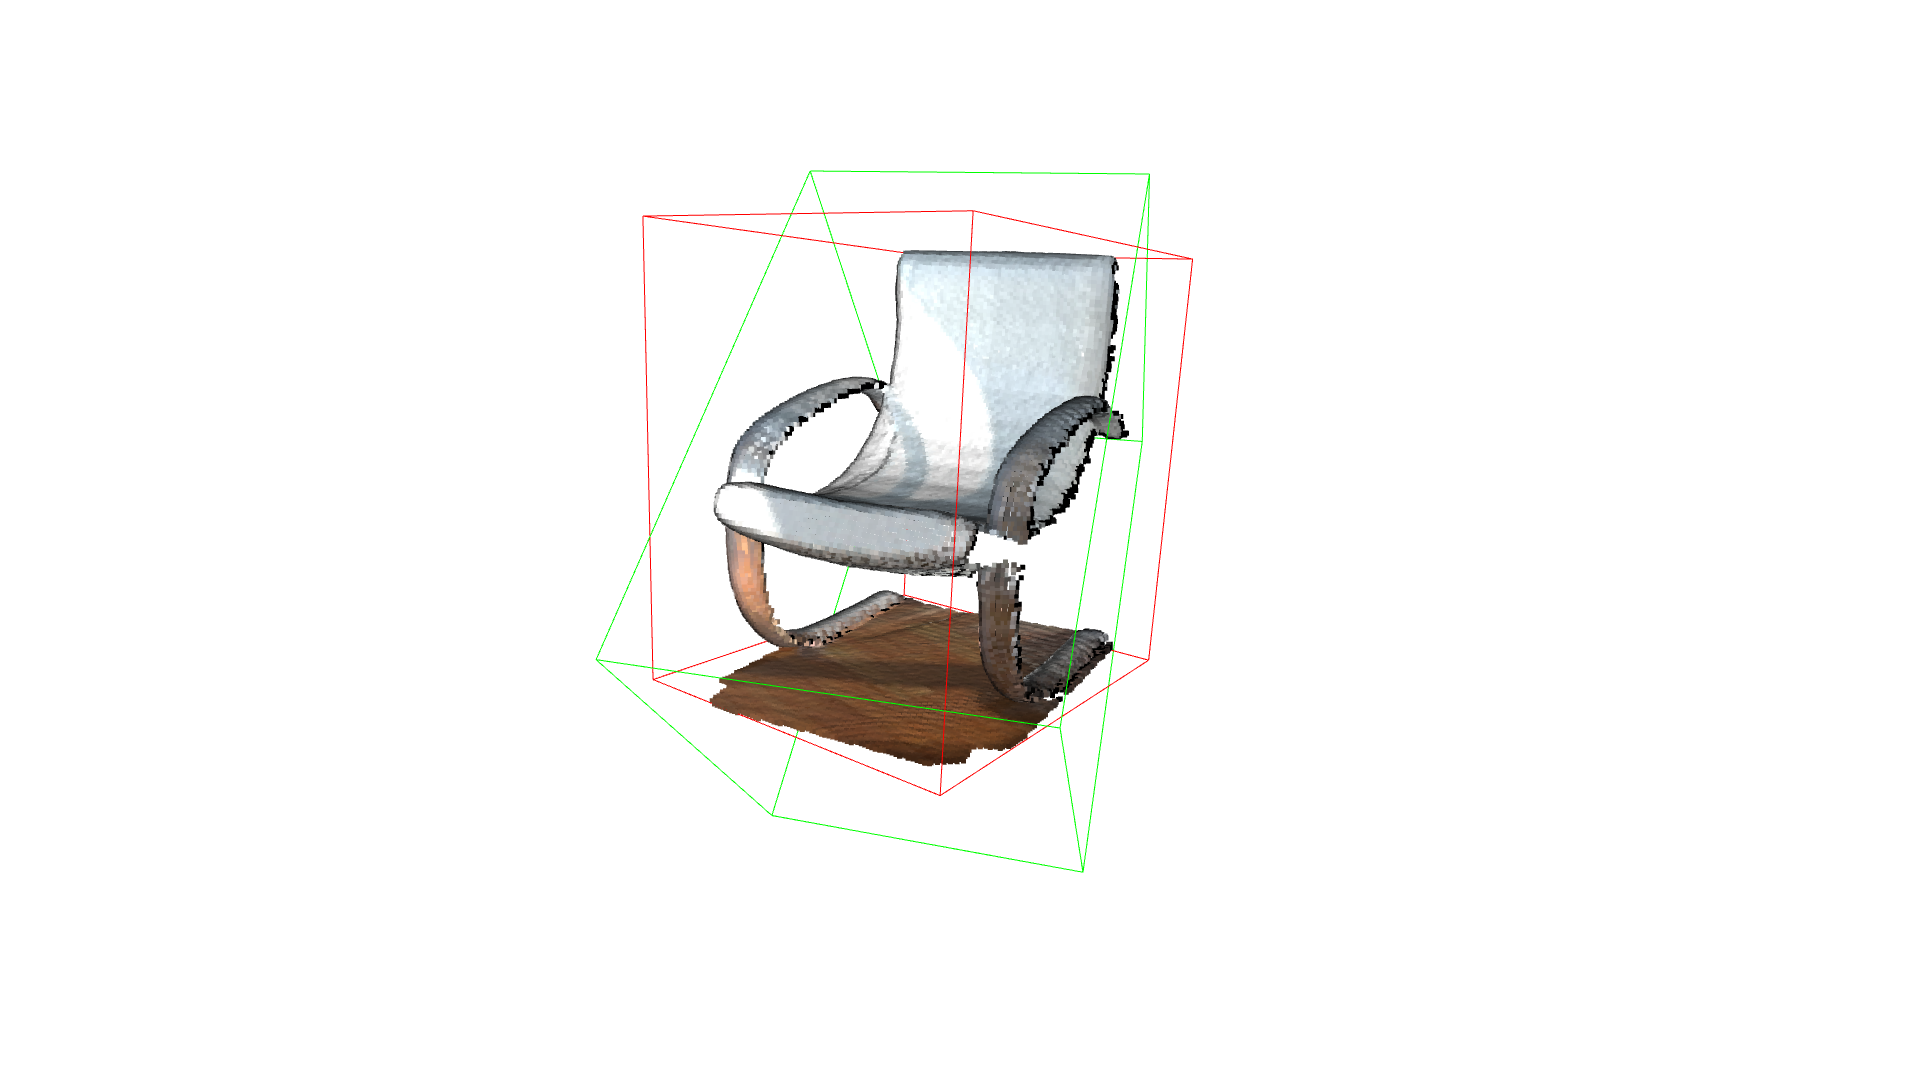

In [12]:
aabb = chair.get_axis_aligned_bounding_box()
aabb.color = (1, 0, 0)
obb = chair.get_oriented_bounding_box()
obb.color = (0, 1, 0)
o3d.visualization.draw_geometries([chair, aabb, obb],
                                  zoom=0.7,
                                  front=[0.5439, -0.2333, -0.8060],
                                  lookat=[2.4615, 2.1331, 1.338],
                                  up=[-0.1781, -0.9708, 0.1608])

## Convex hull
The convex hull of a point cloud is the smallest convex set that contains all points. Open3D contains the method `compute_convex_hull` that computes the convex hull of a point cloud. The implementation is based on [Qhull](http://www.qhull.org/).

In the example code below we first sample a point cloud from a mesh and compute the convex hull that is returned as a triangle mesh. Then, we visualize the convex hull as a red `LineSet`.

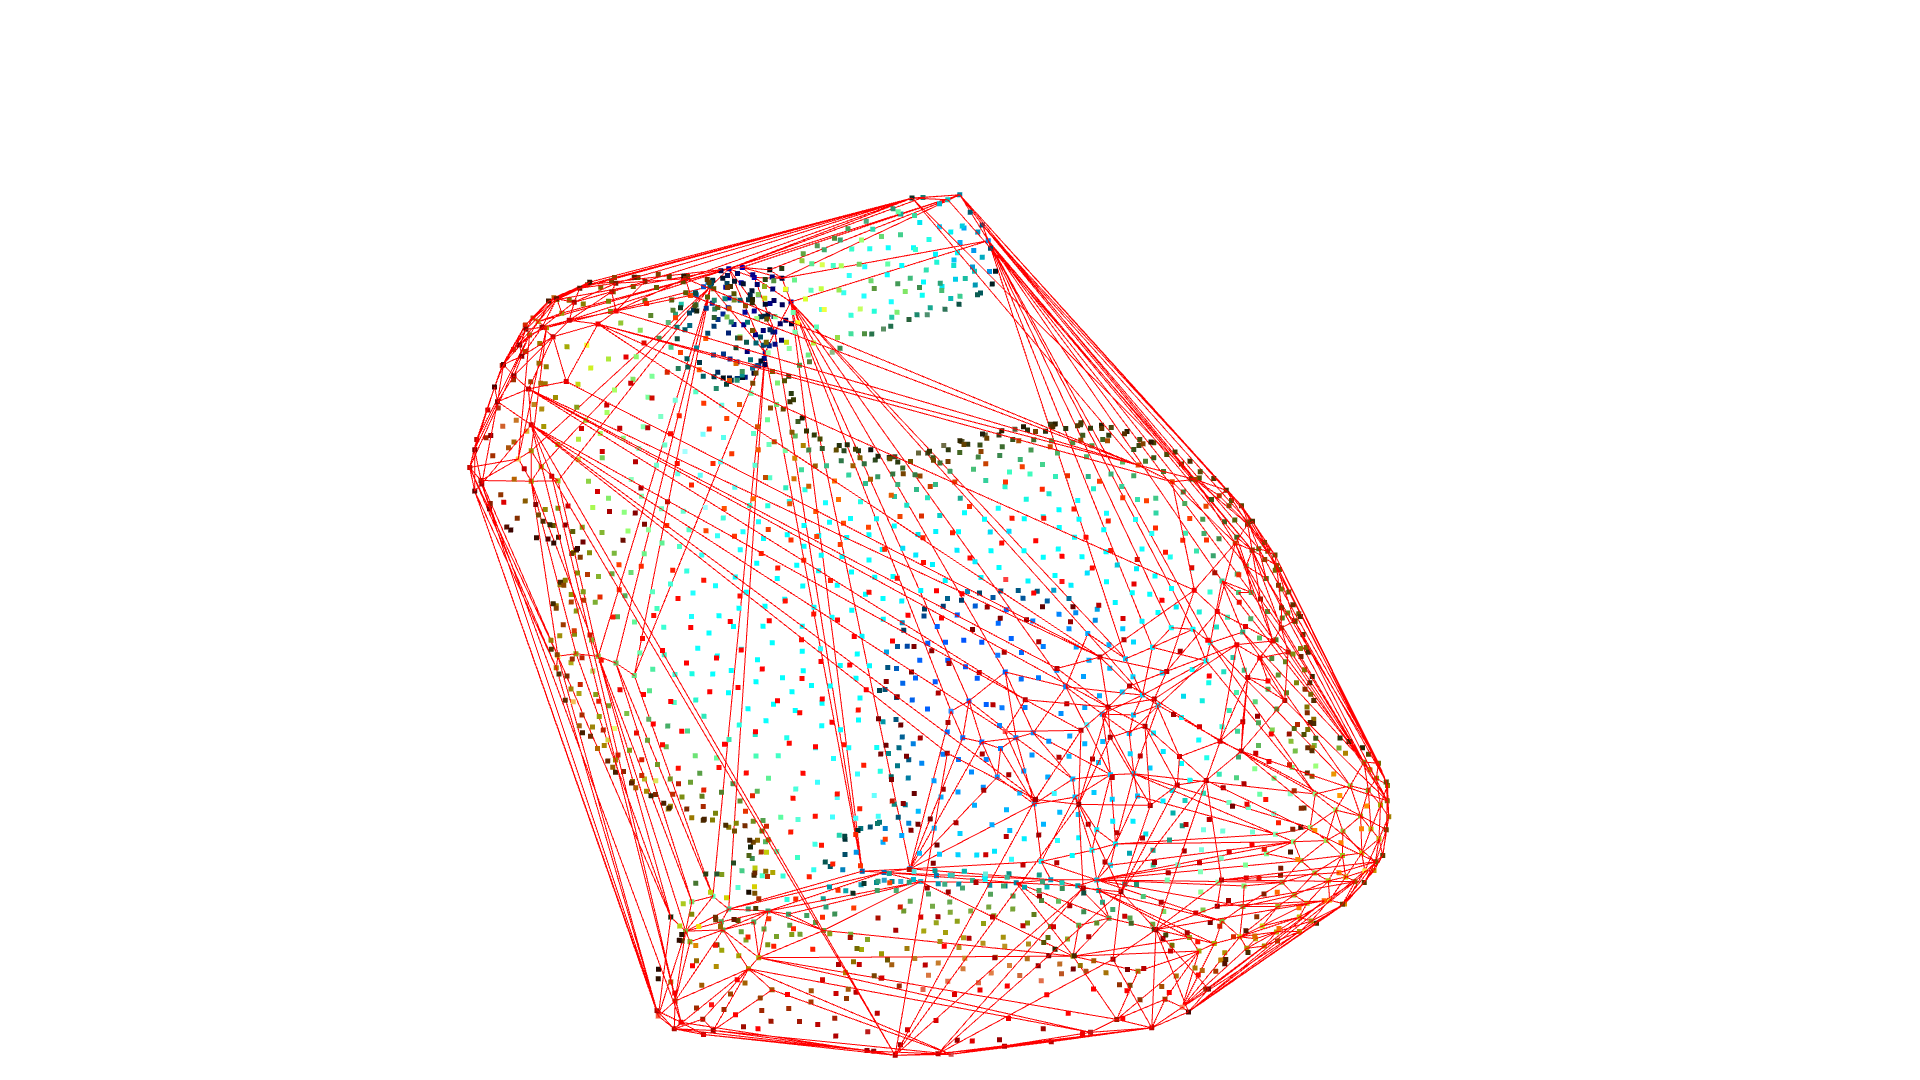

In [13]:
pcl = o3dtut.get_bunny_mesh().sample_points_poisson_disk(number_of_points=2000)
hull, _ = pcl.compute_convex_hull()
hull_ls = o3d.geometry.LineSet.create_from_triangle_mesh(hull)
hull_ls.paint_uniform_color((1, 0, 0))
o3d.visualization.draw_geometries([pcl, hull_ls])

## DBSCAN clustering
Given a point cloud from e.g. a depth sensor we want to group local point cloud clusters together. For this purpose, we can use clustering algorithms. Open3D implements DBSCAN [\[Ester1996\]](../reference.html#Ester1996) that is a density based clustering algorithm. The algorithm is implemented in `cluster_dbscan` and requires two parameters: `eps` defines the distance to neighbors in a cluster and `min_points` defines the minimum number of points required to form a cluster. The function returns `labels`, where the label `-1` indicates noise.

[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.Precompute neighbors.[=>                                      ] 2%
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 10
point cloud has 10 clusters
Precompute neighbors.[========================================] 100%


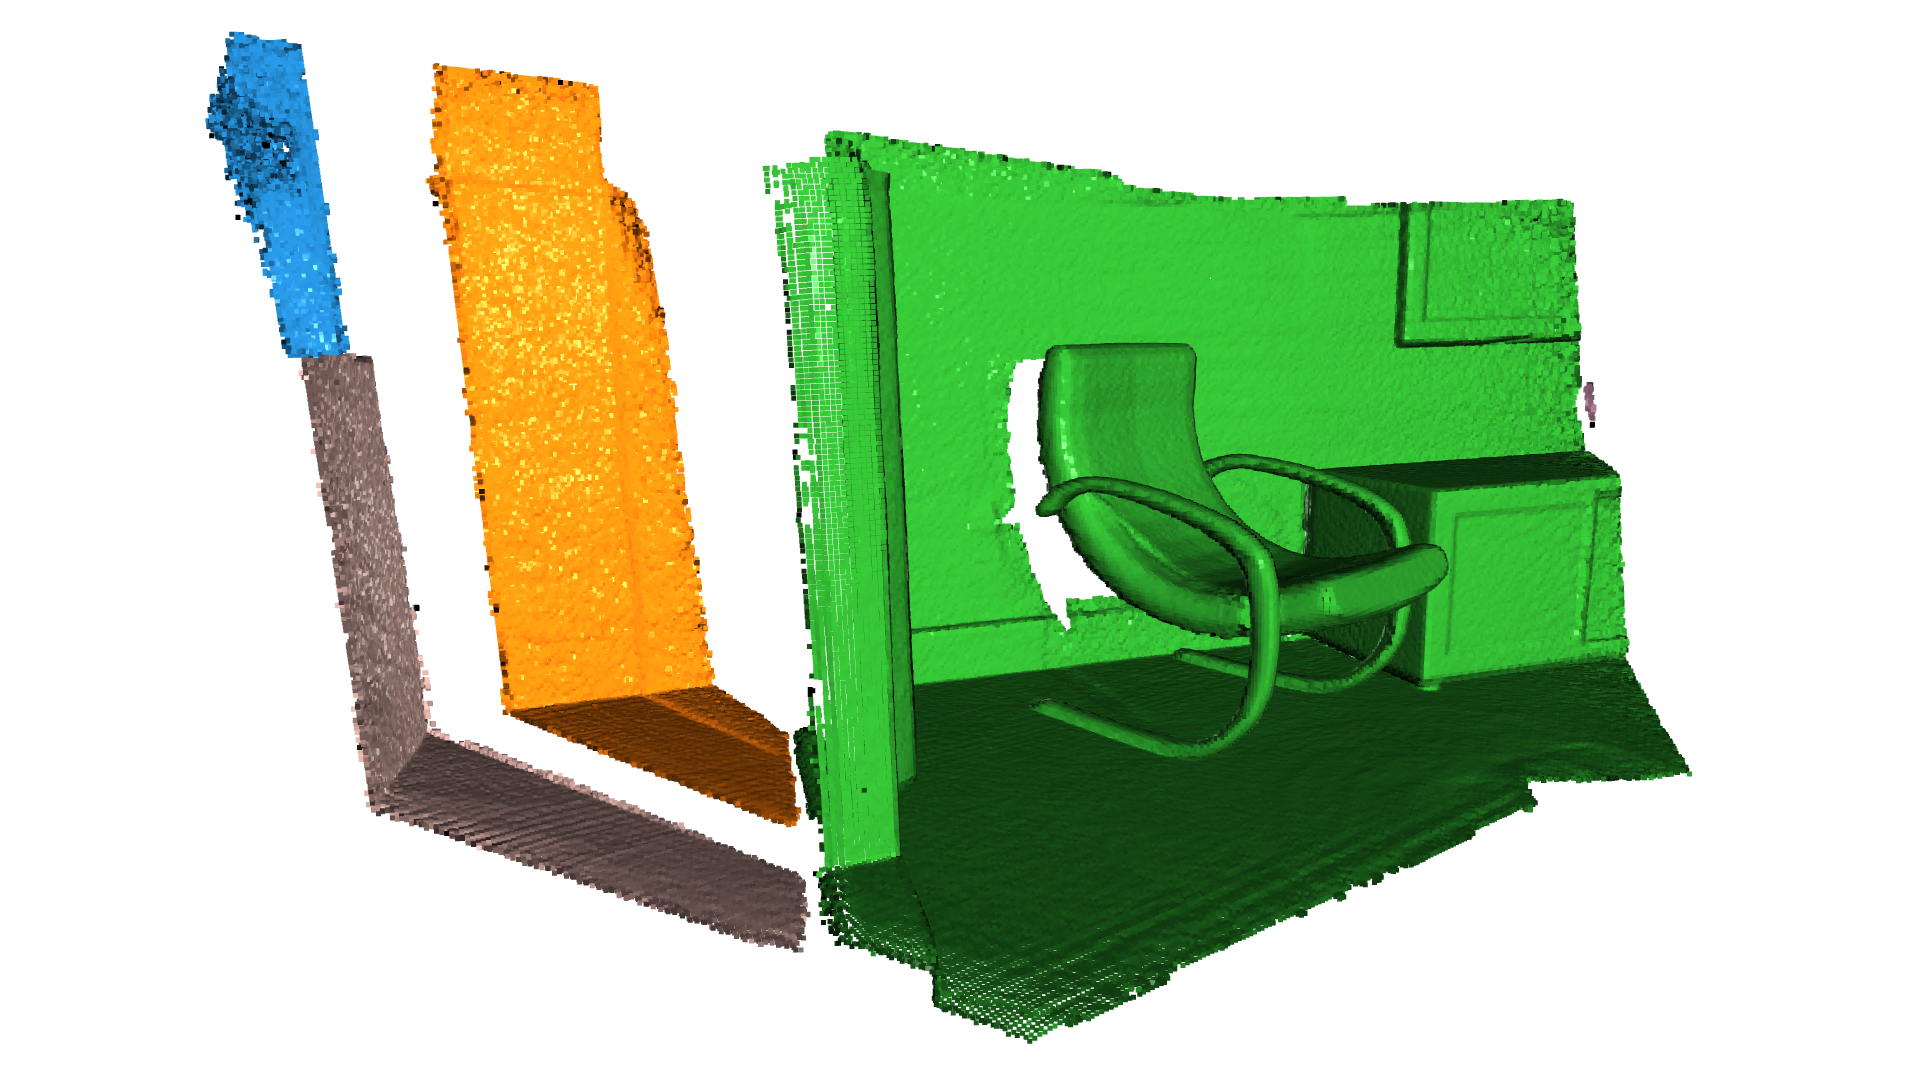

In [14]:
pcd = o3d.io.read_point_cloud(o3dtut.get_data_path_common("fragment.ply"))

with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(
        pcd.cluster_dbscan(eps=0.02, min_points=10, print_progress=True))

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.455,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

<div class="alert alert-info">
    
**Note:** 

This algorithm precomputes all neighbors in the epsilon radius for all points. This can require a lot of memory if the chosen epsilon is too large.

</div>

## Plane segmentation
Open3D also supports segmententation of geometric primitives from point clouds using RANSAC. To find the plane with the largest support in the point cloud, we can use `segment_plane`. The method has three arguments: `distance_threshold` defines the maximum distance a point can have to an estimated plane to be considered an inlier, `ransac_n` defines the number of points that are randomly sampled to estimate a plane, and `num_iterations` defines how often a random plane is sampled and verified. The function then returns the plane as $(a,b,c,d)$ such that for each point $(x,y,z)$ on the plane we have $ax + by + cz + d = 0$. The function further returns a list of indices of the inlier points.

Plane equation: -0.06x + -0.10y + 0.99z + -1.06 = 0


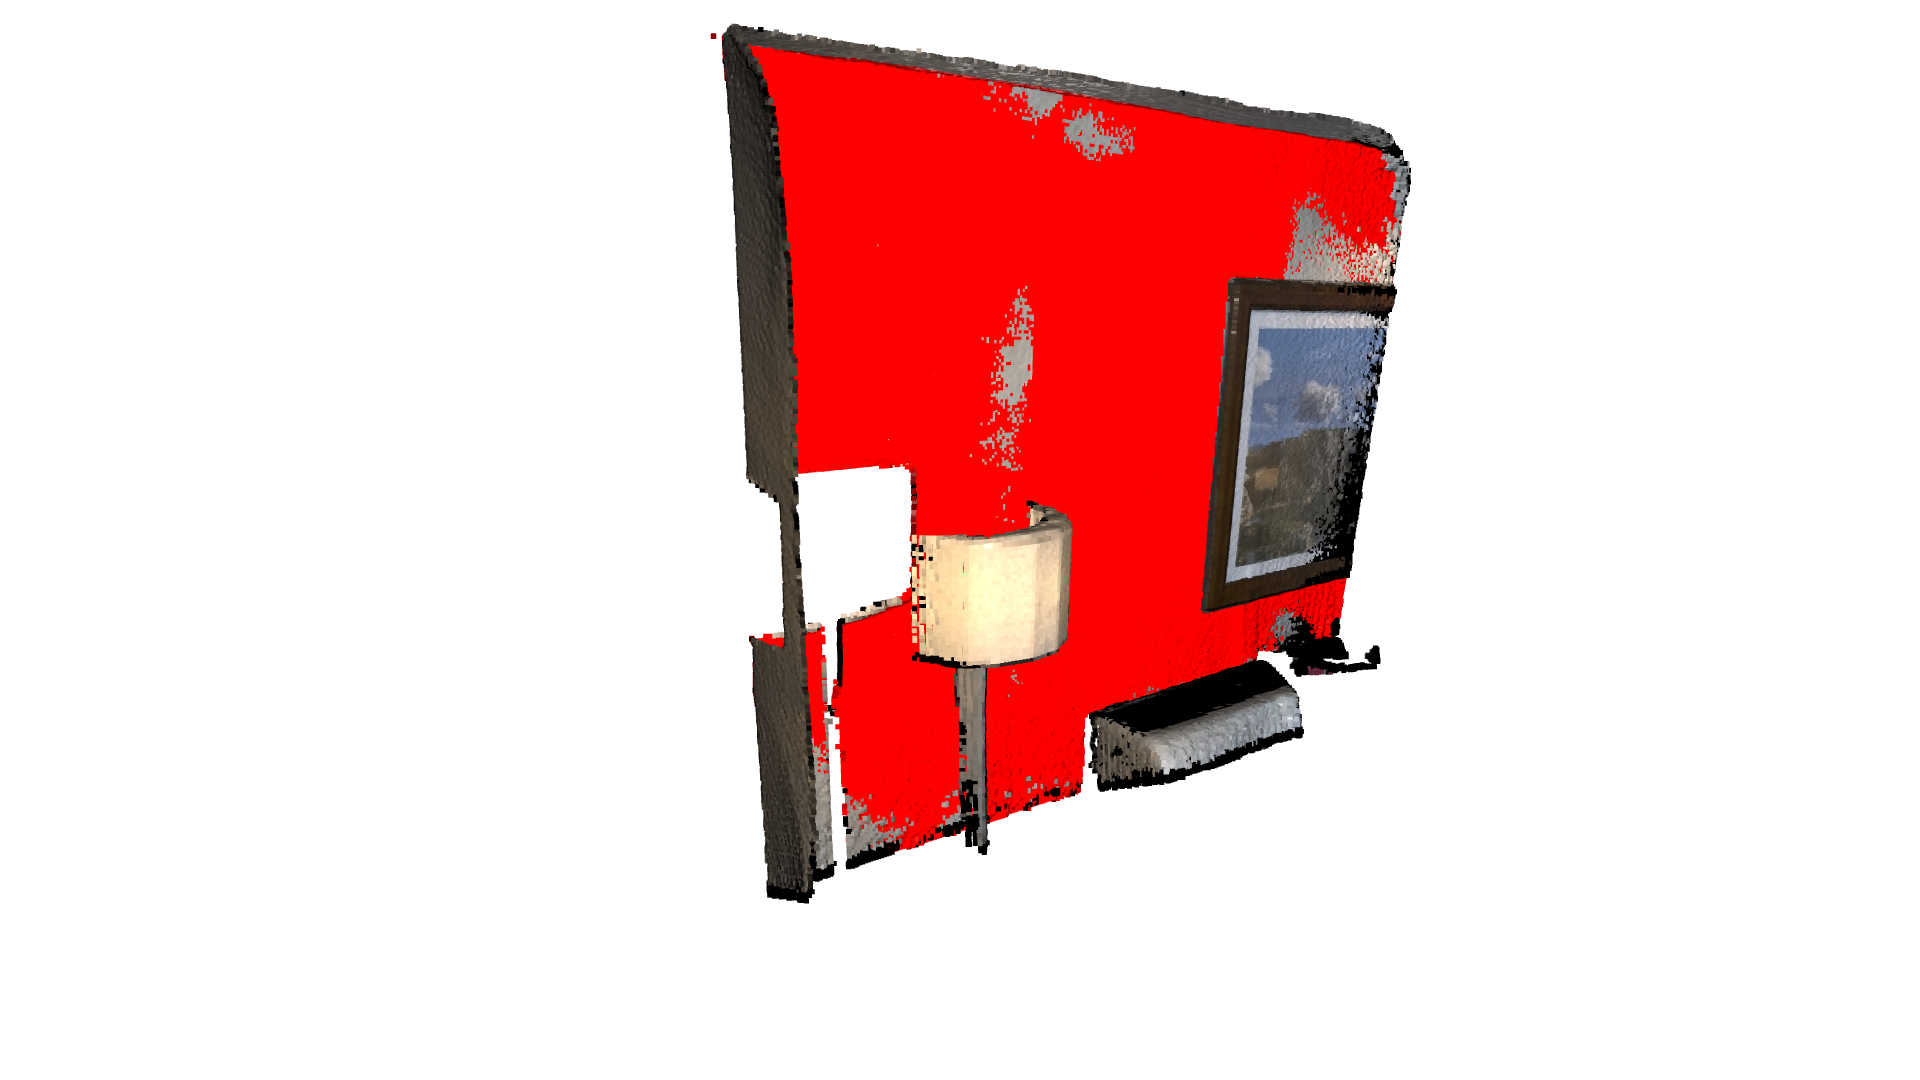

In [15]:
pcd = o3d.io.read_point_cloud(o3dtut.get_data_path_common("fragment.pcd"))
plane_model, inliers = pcd.segment_plane(distance_threshold=0.01,
                                         ransac_n=3,
                                         num_iterations=1000)
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])
outlier_cloud = pcd.select_by_index(inliers, invert=True)
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud],
                                  zoom=0.8,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

## Hidden point removal
Imagine you want to render a point cloud from a given view point, but points from the background leak into the foreground because they are not occluded by other points. For this purpose we can apply a hidden point removal algorithm. In Open3D the method by [\[Katz2007\]](../reference.html#Katz2007) is implemented that approximates the visibility of a point cloud from a given view without surface reconstruction or normal estimation.

Convert mesh to a point cloud and estimate dimensions


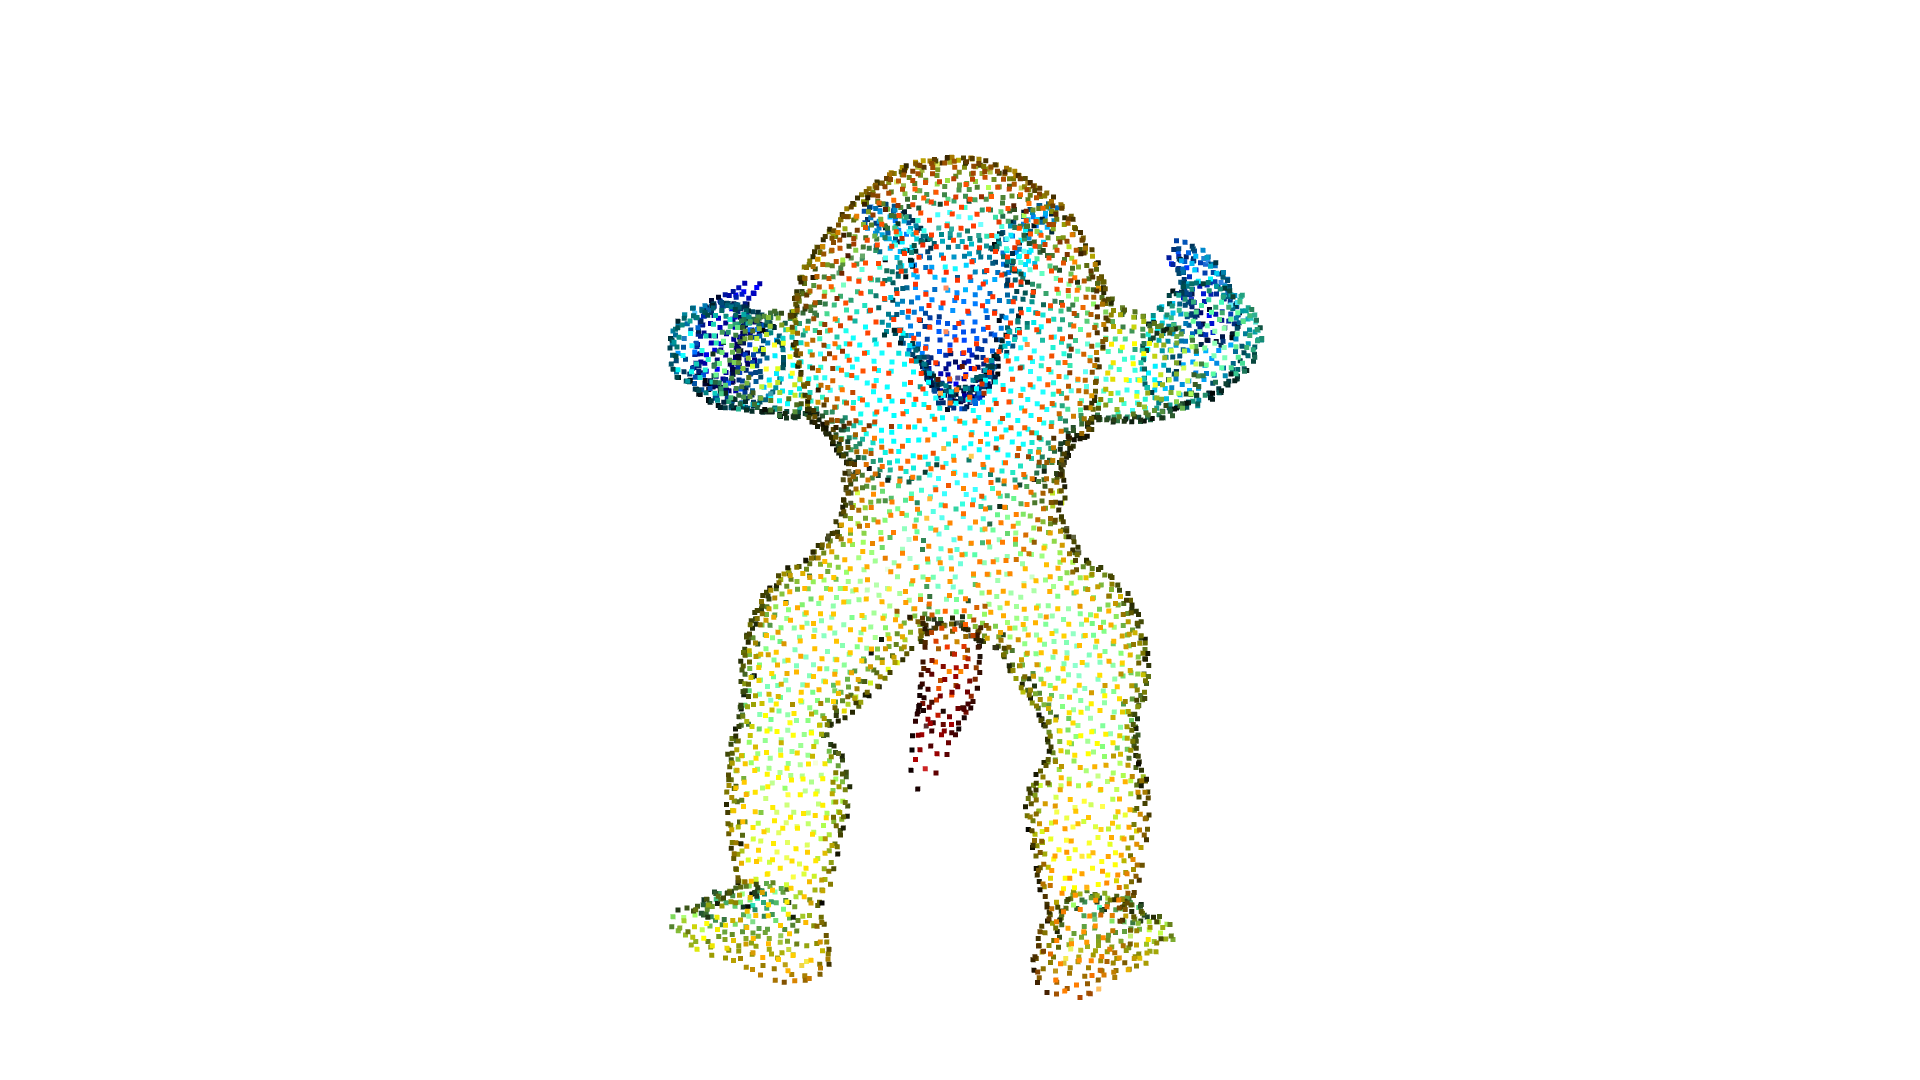

In [16]:
print("Convert mesh to a point cloud and estimate dimensions")
pcd = o3dtut.get_armadillo_mesh().sample_points_poisson_disk(5000)
diameter = np.linalg.norm(
    np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))
o3d.visualization.draw_geometries([pcd])

Define parameters used for hidden_point_removal
Get all points that are visible from given view point
Visualize result


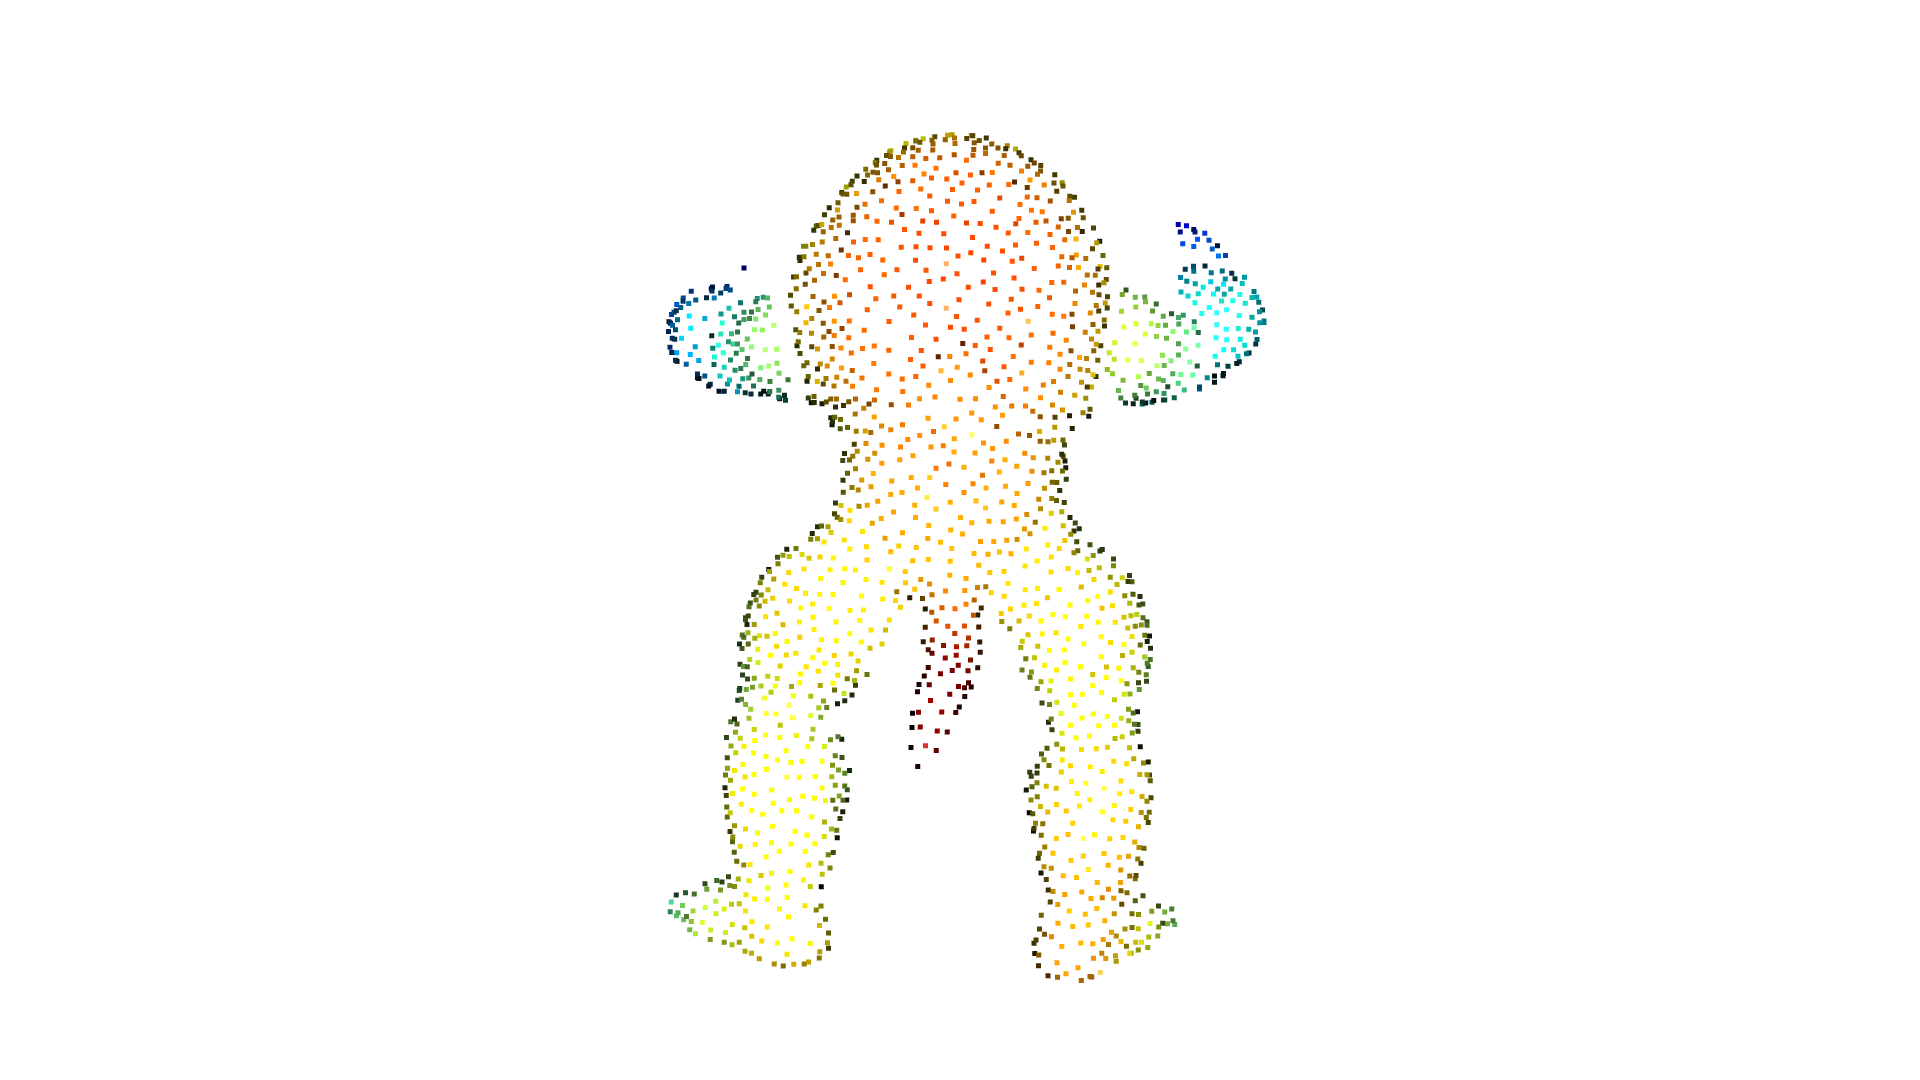

In [17]:
print("Define parameters used for hidden_point_removal")
camera = [0, 0, diameter]
radius = diameter * 100

print("Get all points that are visible from given view point")
_, pt_map = pcd.hidden_point_removal(camera, radius)

print("Visualize result")
pcd = pcd.select_by_index(pt_map)
o3d.visualization.draw_geometries([pcd])